<a href="https://colab.research.google.com/github/TSkinne4/MAT-421/blob/main/Module_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

  We define an ODE as an equation which we can write as 
  $$\frac{d^nf(x)}{dx^n} = F\left(x,f(x),\frac{df(x)}{dx},\frac{d^2f(x)}{dx^2},,\dots,\frac{d^{n-1}f(x)}{dx^{n-1}}\right)$$
This is an nth order ode. This can show up in many situations, for example, the equation of motion for an unforced and undampened spring
$$\frac{d^2x}{dt^2}=-\frac{k}{m}x.$$
These equations contrast to partial differential equations, which are dependant on numerous independant variables, for example the heat equation:
$$\nabla^2\Theta=\frac{1}{\lambda}\frac{\partial\Theta}{\partial t}.$$

For differential equaitions, a particular solution is satisfies both the equation plus other conditions on the value of the equation and its derivatices at certain point. One such form of conditions is the initial value problem, for which we know the value of the funtion and all the way up to the (n-1)th derivative at zero. These problems can be solved by iterating from what we know, forward. 

#Reduction of order

Many of the methods that have been developed to sovle differential equations are specifically made to solve first order differential equations. Thus, these methods will not be usable for higher order equations unless we reduce the order. For this, we define a "state" as
  $$S(t) = \left(\begin{array}{c}
    f(t)\\
    f^{(1)}(t)\\
    f^{(2)}(t)\\
    \dots\\
    f^{(n-1)}(t)
  \end{array}\right). = \left(\begin{array}{c}S_1(t)\\S_2(t)\\S_3(t)\\\dots\\S_{n}(t)\end{array}\right)$$
This allows us to see
  $$\frac{dS(t)}{dt} = \left(\begin{array}{c}
    f^{(1)}(t)\\
    f^{(2)}(t)\\
    f^{(3)}(t)\\
    \dots\\
    f^{(n)}(t)
  \end{array}\right). = \left(\begin{array}{c}S_2(t)\\S_3(t)\\S_4(t)\\\dots\\F(t,S_1(t),S_2(t),\dots,S_{n-1}(t))\end{array}\right)$$
We can thus write that
$$\frac{dS(t)}{dt}=AS(t),$$
where A is some matrix that describes the relationship between the terms if the ODE is linear. For example, take the damped harmonic oscillator euqation, 
$$\frac{d^2x(t)}{dt^2}+b\frac{dx(t)}{dt}+\frac{k}{m}x(t) = 0.$$
We can write this as
$$\frac{dS(t)}{dt}= \left(\begin{array}{cc} 0 &1\\-\frac{k}{m} & -b
\end{array}\right)S(t)$$
 
 #Euler Method

 Letting $\frac{dS(t)}{dt} = F(t,S(t))$ and t being an evenly spaced grid on the interval $[t_0,t_f]$ with a spacing h. With this, we can approximate
  $$S(t_{j+1})=S(t_j)+(t_{j+1}=t_j)\frac{dS(t_j)}{dt}$$
  which can be written
  $$S(t_{j+1})=S(t_j)+hF(t_j,S(t_j))$$
This is the explicit Euler formula.  We will use this formula to solve the dampened harmonic oscillator formula that we saw earlier, assuming that $f(0)=10$, $f'(0)=1$, $k/m=1$ and $b=0.1$.


Text(0.5, 0, 't')

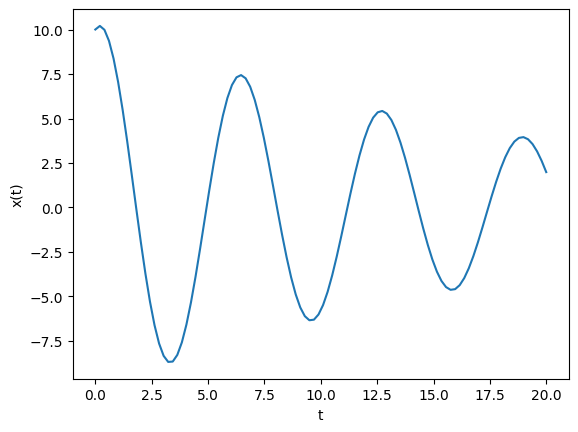

In [27]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
t_final = 20
h = t_final/(N-1)


b = 0.1
km = 1

t_list = np.linspace(0,t_final,N)
x_list = np.zeros_like(t_list)

S = np.array([10.0,1.0])
n = 0
while n < N:
  x_list[n] = S[0]
  New_S = S[:]
  New_S[0] = S[0] + h*S[1]
  New_S[1] = S[1] + h*(-km*S[0]-b*S[1])
  S[:] = New_S[:] 
  n += 1
plt.plot(t_list,x_list)
plt.ylabel('x(t)')
plt.xlabel('t')







We can also observe this same method for solving air position vs time of an object experiencing air resistance as its only force:
  $$\frac{d^2x(t)}{dt^2} = -\frac{k}{m}\frac{dx}{dt}$$
Reduction of order allows us to write
  $$\left(\begin{array}{c}x'(t)\\x''(t)\end{array}\right)= \left(\begin{array}{cc}0 & 1\\0 & -\frac{k}{m}\end{array}\right)\left(\begin{array}{c}x(t)\\x'(t)\end{array}\right). $$
We will observe this with $x(0)=0$, $x'(0) = 20$ and $k/m=2$
Analytically, we could find that the solution is
  $$x(t) = 10\left[1-e^{-2t}\right].$$
The following code superimposes the numerical and analytical solutions


Text(0.5, 0, 't')

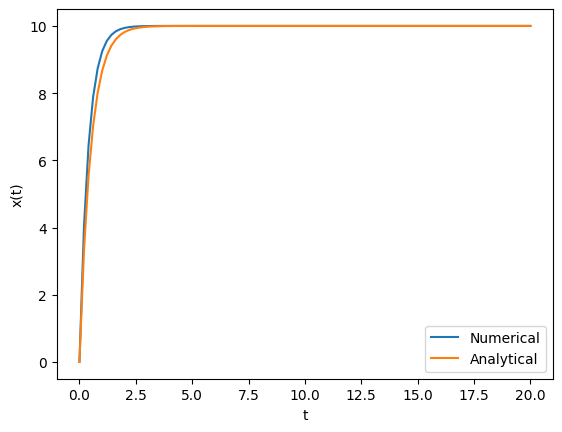

In [32]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
t_final = 20
h = t_final/(N-1)

km = 2

t_list = np.linspace(0,t_final,N)
x_list = np.zeros_like(t_list)

S = np.array([0.0,20.0])
n = 0
while n < N:
  x_list[n] = S[0]
  New_S = S[:]
  New_S[0] = S[0] + h*S[1]
  New_S[1] = S[1] + h*(-km*S[1])
  S[:] = New_S[:] 
  n += 1
exact = 10*(1-np.exp(-2*t_list))
plt.plot(t_list,x_list,label = 'Numerical')
plt.plot(t_list,exact,label = 'Analytical')
plt.legend()
plt.ylabel('x(t)')
plt.xlabel('t')
